### Import Required Files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder,Normalizer
from sklearn.model_selection import cross_val_score
import category_encoders as ce

### Read train & test files

In [2]:
data=pd.read_csv('train_0OECtn8.csv')
test_data=pd.read_csv('test_1zqHu22.csv')

### Get Data Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [7]:
data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


### There are no missing values for train & test data
#### 1. We don't need to check about Handling the missing values
#### 2. As per observation it looks like their are no outlier, no need to handle it

In [6]:
data.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [11]:
test_data.describe()

,row_id,user_id,category_id,video_id,age,followers,views
count,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000
mean,94758.000000,13825.707400,15.666487,79.742559,24.854150,249.691574,454.959986
std,3210.500506,8001.221954,10.313259,48.702501,8.953976,38.511469,249.759038
min,89198.000000,2.000000,1.000000,1.000000,10.000000,160.000000,44.000000
25%,91978.000000,6881.000000,8.000000,39.000000,18.000000,230.000000,229.000000
50%,94758.000000,13857.000000,12.000000,80.000000,23.000000,240.000000,369.000000
75%,97538.000000,20763.000000,25.000000,121.000000,32.000000,270.000000,662.000000
max,100318.000000,27734.000000,46.000000,174.000000,68.000000,360.000000,990.000000


### Check uniuqe values for each column

In [8]:
for col in data.columns:
    print(f'{col}: {data[col].nunique()}')

row_id: 89197
user_id: 27734
category_id: 47
video_id: 175
age: 58
gender: 2
profession: 3
followers: 17
views: 43
engagement_score: 229


## Plot relationship b/w independent and dependent feature

[]

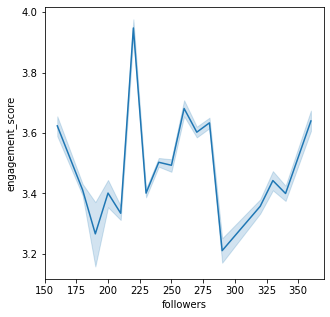

In [12]:
plt.figure(figsize=(5,5))
sns.lineplot(data=data, x="followers", y="engagement_score")
plt.plot()

## Conclusion
### 1. No straight realtionship b/w followers and engagement_score

[]

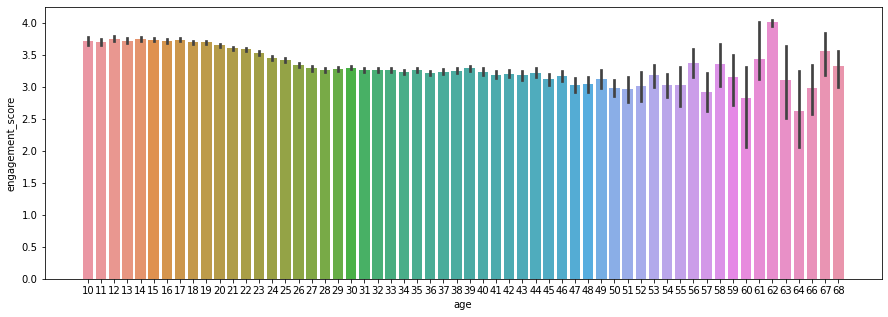

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x="age", y="engagement_score")
plt.plot()

## Conclusion
### 1. As per observation young age group showing little bit more engagement_score compare to others

[]

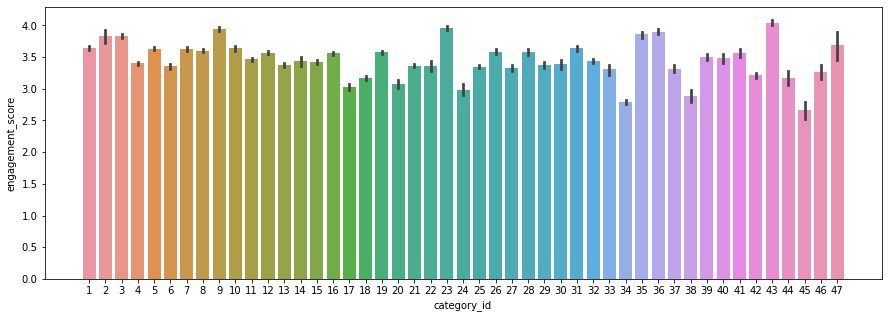

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x="category_id", y="engagement_score")
plt.plot()

[]

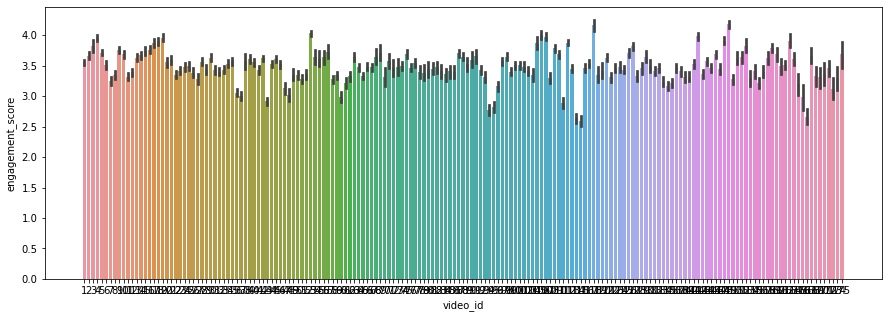

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x="video_id", y="engagement_score")
plt.plot()

## Conclusion
### 1. No straight realtionship b/w video_id and engagement_score

## Conclusion
### 1. all category_id showing approx same behaviour with engagement_score
### 2. Not any specific category_id showing special behaviour with engagement_score

[]

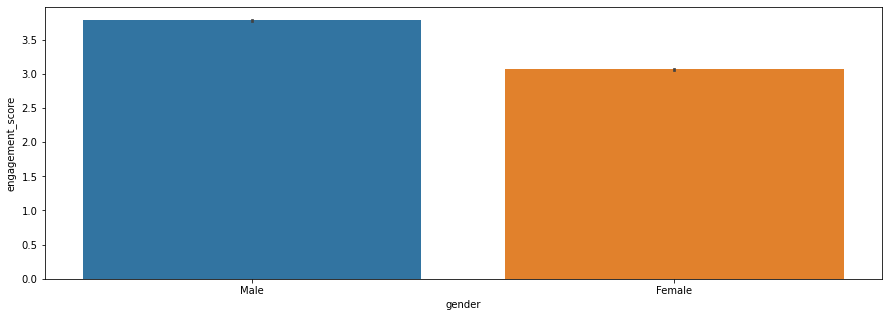

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x="gender", y="engagement_score")
plt.plot()

## Conclusion
### 1. Male Gender effecting little bit more to  engagement_score in compare of Female Gender

[]

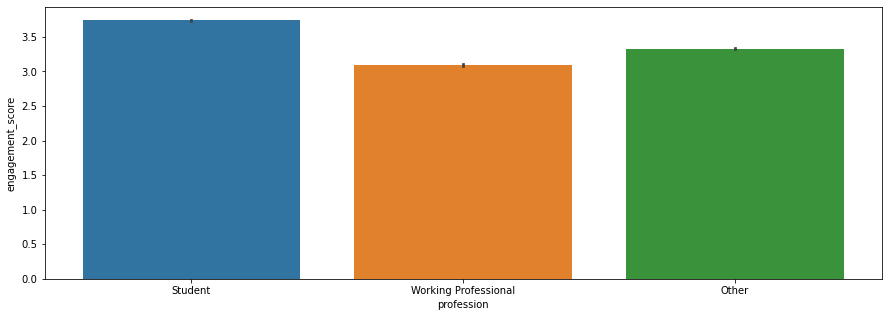

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x="profession", y="engagement_score")
plt.plot()

## Conclusion
### 1. All types of profession showing approx similar behaviour withrespect to  engagement_score

[]

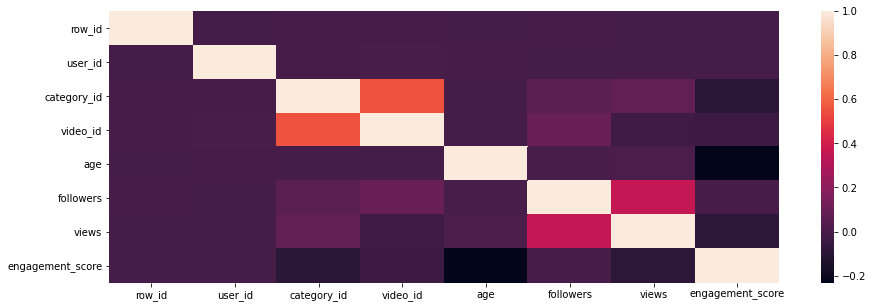

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr())
plt.plot()

## Conclusion
### 1. No idenpendent feature showing stronge realtion ship with dependent feature
### 2. category_id and video_id showing some relationship, so we can try to remove someone